In [18]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn

In [1]:
TRENDS_TARGET_FILE = "trends_v5.csv.gz"

trends df file is after predefining start point as being after at least (4?) cases of >0 in previous 5 (?) years.

* Target def used in latest odel is being after ~ 1980 (with 4-5~ Y offset. PAtents in patentview start around 1976) 

* Data in this DF is ALREADH filtered for `df.loc[df["Year"]>=df["start"]]`


* orig `df["y_pct_bins"] = pd.cut(df["y_pct_diff"],bins=[-20,-0.04,0.04,20])`
* orig `df = df.loc[df["year_num"]<2020]`

* Orig `df["pct_diff_lag6"] = df.groupby("variable")["y_pct_diff"].shift(6)` - that is not right target! Existing is diff of consecutive year, we want vs "current" year!

In [2]:
df = pd.read_csv(TRENDS_TARGET_FILE,parse_dates=["Year","first","start"])#.set_index("Year")
df.drop(columns=[ 'lag2','lag3','y_pct_bins'],errors="ignore",inplace=True)
display(df.describe().round(2))
df

NameError: name 'pd' is not defined

In [3]:
### future y target (for lagged corr with other variables)
df["y_future_4"] = df.groupby(["variable"])["y_raw"].shift(-4)
df["pct_diff_lag4"] = df.groupby("variable")["y_raw"].pct_change(4) # change vs 4 years prior
df

NameError: name 'df' is not defined

In [22]:
# df.loc[df["Year"]>=df["start"]]
df = df.loc[df["Year"].dt.year>1980]
print(df.shape[0])

4598


In [23]:
df.corrwith(df["y_raw"]).round(3).sort_values() # leaky model

pct_diff                -0.080
y_pct_diff              -0.079
pct_diff_lag6           -0.061
research_review_ratio    0.070
year_num                 0.082
y_diff                   0.286
diff_lag5                0.309
patent_count             0.419
reviews                  0.907
lag6                     0.983
lag5                     0.987
lag4                     0.991
y_future_4               0.991
research_review_diff     0.996
lag1                     0.999
y_raw                    1.000
dtype: float64

In [24]:
df.corrwith(df["y_future_4"]).round(3).sort_values()

pct_diff                -0.069
y_pct_diff              -0.068
pct_diff_lag6           -0.052
year_num                 0.068
research_review_ratio    0.073
diff_lag5                0.333
y_diff                   0.369
patent_count             0.445
reviews                  0.906
lag6                     0.966
lag5                     0.970
lag4                     0.975
research_review_diff     0.987
lag1                     0.987
y_raw                    0.991
y_future_4               1.000
dtype: float64

In [8]:
# df = df.replace(0,np.nan)  ## may not make sense - what about intermediate years with 0? 

* View distribution of future changes
* clip percent changes to bounds (helps with outliers). Maybe drop 0s?

In [26]:
df["y_pct_diff"].describe()

count    4598.000000
mean        0.080210
std         0.338351
min        -1.000000
25%        -0.033996
50%         0.016375
75%         0.097571
max         7.886121
Name: y_pct_diff, dtype: float64

In [27]:
df["y_pct_diff"].clip(lower=-1,upper=1).describe()

count    4598.000000
mean        0.065790
std         0.235030
min        -1.000000
25%        -0.033996
50%         0.016375
75%         0.097571
max         1.000000
Name: y_pct_diff, dtype: float64

##### % diff at lag

In [42]:
df["pct_diff_lag4"].describe()

count    4100.000000
mean             inf
std              NaN
min        -1.000000
25%        -0.071791
50%         0.080854
75%         0.356802
max              inf
Name: pct_diff_lag4, dtype: float64

<AxesSubplot:>

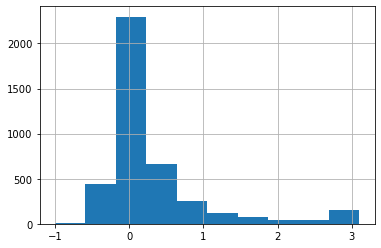

In [51]:
df["pct_diff_lag4"].clip(lower=-1,upper=3.1).hist()

In [46]:
df["pct_diff_lag4"].clip(lower=-1,upper=2).describe()

count    4100.000000
mean        0.269222
std         0.578891
min        -1.000000
25%        -0.071791
50%         0.080854
75%         0.356802
max         2.000000
Name: pct_diff_lag4, dtype: float64

<AxesSubplot:>

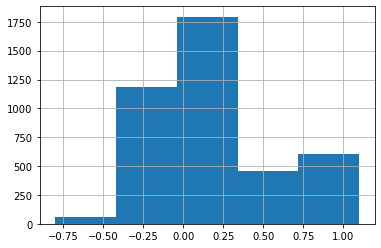

In [60]:
df["pct_diff_lag4"].clip(lower=-0.8,upper=1.1).hist(bins=5)

<AxesSubplot:>

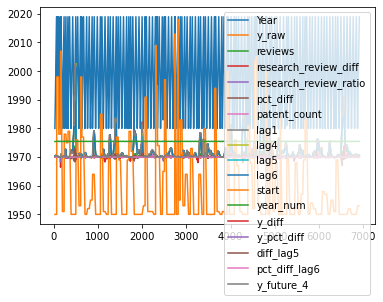

In [25]:
df.plot()

### 1st order difference makesi t easier to see big changes
* Note major OOM between topics

<AxesSubplot:xlabel='Year'>

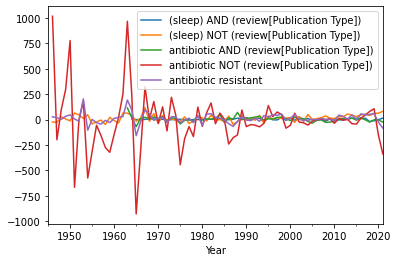

In [17]:
df.diff().plot()

<AxesSubplot:xlabel='Year'>

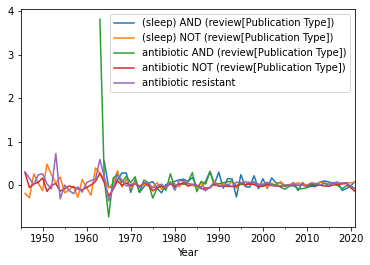

In [18]:
df.apply(np.log1p).diff().plot()

<AxesSubplot:xlabel='Year'>

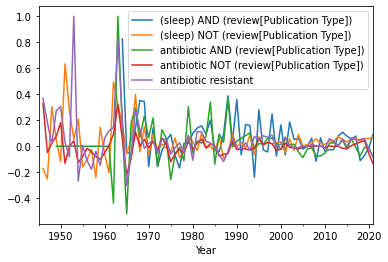

In [19]:
df.pct_change().clip(upper=1).plot()

# Stats on contexts
* How many reviews, papers, patents etc' (per keyword)

In [62]:
df_grp = df.set_index("Year").groupby("variable")

In [71]:
print("Overall patents")
df["patent_count"].describe().round(2)

print("total patents",df["patent_count"].sum())

Overall patents
total patents 154928.0


In [73]:
print("Overall reviews")
df["reviews"].describe().round(2)

# print("total (normalized) reviews",df["reviews"].sum()) ## this isn't meaningful since it's a fraction..

Overall reviews


count    4598.00
mean       66.13
std       146.42
min         0.00
25%         2.61
50%        15.49
75%        53.81
max      1427.12
Name: reviews, dtype: float64

* Per group stats- e.g. group with most reviews in a given year? or total? 

In [67]:
df_grp["reviews"].sum().describe().round(1)

count      125.0
mean      2432.4
std       5095.4
min          0.2
25%        150.9
50%        584.1
75%       2036.3
max      37952.2
Name: reviews, dtype: float64